In [10]:
# 1) Imports & settings
import os
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))

from src.data_loader import load_nsl_kdd

pd.set_option("display.max_columns", 120)
plt.rcParams["figure.figsize"] = (9, 5)


In [11]:
# 2) Load train & test with 5-class labels and one-hot features
BASE_DIR = os.path.expanduser("~/datasets/nsl-kdd")

train_df, test_df = load_nsl_kdd(
    split="both",
    base_dir=BASE_DIR,
    download_if_missing=False,   # set True if you want auto-download
    drop_difficulty=True,
    map_to_5class=True,
    one_hot=True                 # one-hot so all features are numeric
)

train_df.shape, test_df.shape


((54216, 122), (3072, 122))

In [12]:
# Peek at the data
display(train_df.head())
train_df.info()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label_5class,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,...,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Normal,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,Fa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54216 entries, 0 to 54215
Columns: 122 entries, duration to flag_SH
dtypes: bool(82), category(1), float64(26), int64(12), object(1)
memory usage: 20.4+ MB


In [13]:
# Basic stats for numeric columns
train_df.describe().T.head(20)


,count,mean,std,min,25%,50%,75%,max
duration,54216.0,296.736314,2.643262e+03,0.0,0.0,0.0,0.00,4.286200e+04
src_bytes,54216.0,49102.293419,5.915854e+06,0.0,0.0,44.0,275.00,1.167519e+09
dst_bytes,54216.0,3169.389664,7.849801e+04,0.0,0.0,0.0,520.25,5.153771e+06
land,54216.0,0.000129,1.136217e-02,0.0,0.0,0.0,0.00,1.000000e+00
wrong_fragment,54216.0,0.021857,2.494335e-01,0.0,0.0,0.0,0.00,3.000000e+00
urgent,54216.0,0.000074,1.358107e-02,0.0,0.0,0.0,0.00,3.000000e+00
hot,54216.0,0.199369,2.133885e+00,0.0,0.0,0.0,0.00,7.700000e+01
num_failed_logins,54216.0,0.001125,4.482463e-02,0.0,0.0,0.0,0.00,4.000000e+00
logged_in,54216.0,0.394146,4.886709e-01,0.0,0.0,0.0,1.00,1.000000e+00
num_compromised,54216.0,0.209053,1.034655e+01,0.0,0.0,0.0,0.00,8.840000e+02


Binary (Normal vs Attack):


,count,percent
label_5class,,
Normal,28800,53.12
Attack,25416,46.88


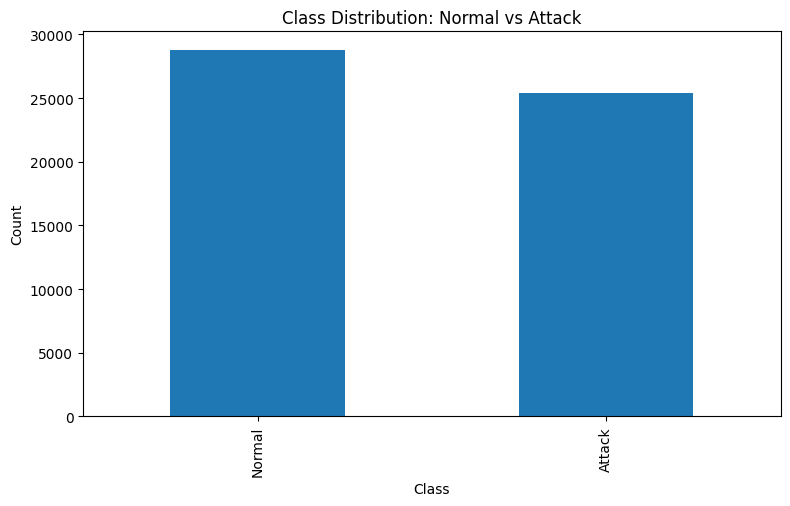

In [14]:
# Binary label: Attack = not Normal
y5 = train_df["label_5class"].astype(str)
y_bin = (y5 != "Normal").astype(int)

bin_counts = y_bin.value_counts().rename({0:"Normal", 1:"Attack"})
bin_pct = (bin_counts / bin_counts.sum() * 100).round(2)

print("Binary (Normal vs Attack):")
display(pd.DataFrame({"count": bin_counts, "percent": bin_pct}))

# Simple bar chart
bin_counts.plot(kind="bar", title="Class Distribution: Normal vs Attack")
plt.xlabel("Class"); plt.ylabel("Count")
plt.show()


5-Class distribution:


,count,percent
label_5class,,
Normal,28800,53.12
DoS,19874,36.66
Probe,5058,9.33
R2L,457,0.84
U2R,26,0.05
Unknown,1,0.00


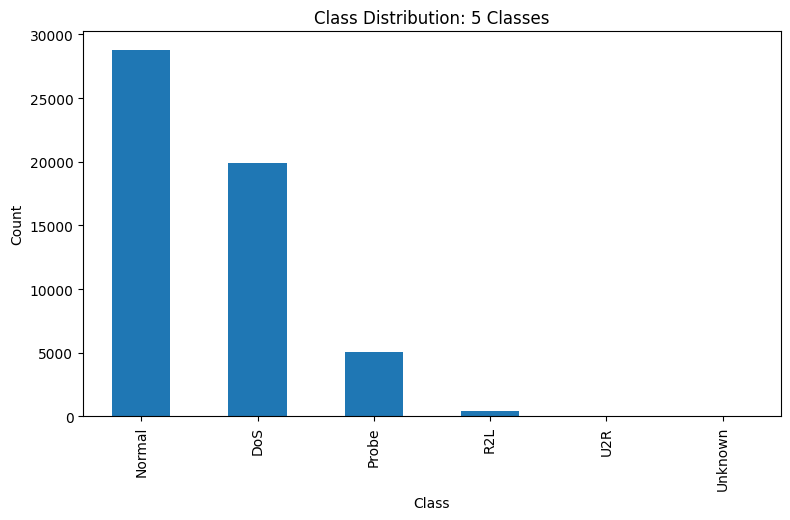

In [15]:
five_counts = y5.value_counts()
five_pct = (five_counts / five_counts.sum() * 100).round(2)

print("5-Class distribution:")
display(pd.DataFrame({"count": five_counts, "percent": five_pct}).sort_values("count", ascending=False))

# Bar chart
five_counts.sort_values(ascending=False).plot(kind="bar", title="Class Distribution: 5 Classes")
plt.xlabel("Class"); plt.ylabel("Count")
plt.show()


In [16]:
# Split features & labels
X = train_df.drop(columns=["label", "label_5class"])
y_attack = (train_df["label_5class"].astype(str) != "Normal").astype(int)  # binary target

X.shape, y_attack.shape


((54216, 120), (54216,))

,corr_with_attack
flag_SF,-0.756237
same_srv_rate,-0.750877
dst_host_srv_count,-0.722772
dst_host_same_srv_rate,-0.693380
logged_in,-0.688650
dst_host_srv_serror_rate,0.654239
dst_host_serror_rate,0.651474
flag_S0,0.649702
serror_rate,0.649472
srv_serror_rate,0.647277


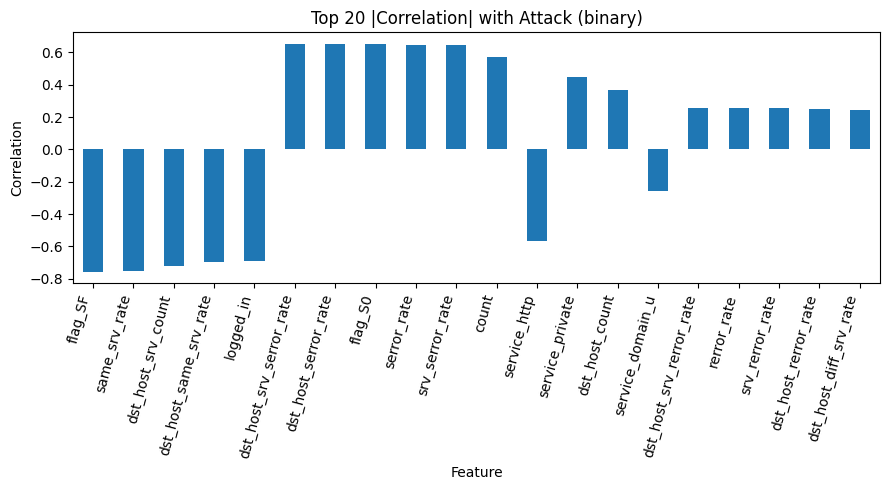

In [17]:
# Compute Pearson correlation of each feature with the binary target
# (For a binary target, Pearson reduces to point-biserial correlation.)
corr_with_target = X.assign(__y__=y_attack).corr(numeric_only=True)["__y__"].drop("__y__").sort_values(key=np.abs, ascending=False)

# Show top 20 by absolute correlation
corr_top20 = corr_with_target.head(20)
display(corr_top20.to_frame("corr_with_attack"))

# Plot
corr_top20.plot(kind="bar", title="Top 20 |Correlation| with Attack (binary)")
plt.xlabel("Feature"); plt.ylabel("Correlation")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


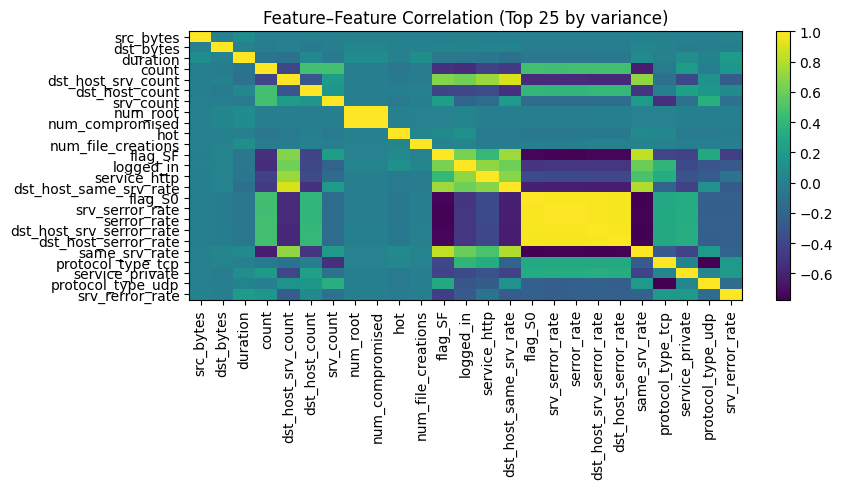

Highly correlated pairs (|r| >= 0.95): 14
 1. num_compromised                 ~  num_root                        r=0.999
 2. serror_rate                     ~  srv_serror_rate                 r=0.994
 3. rerror_rate                     ~  srv_rerror_rate                 r=0.989
 4. srv_serror_rate                 ~  dst_host_srv_serror_rate        r=0.985
 5. dst_host_serror_rate            ~  dst_host_srv_serror_rate        r=0.985
 6. srv_serror_rate                 ~  flag_S0                         r=0.983
 7. dst_host_srv_serror_rate        ~  flag_S0                         r=0.982
 8. serror_rate                     ~  dst_host_srv_serror_rate        r=0.981
 9. serror_rate                     ~  flag_S0                         r=0.980
10. serror_rate                     ~  dst_host_serror_rate            r=0.979
11. srv_serror_rate                 ~  dst_host_serror_rate            r=0.977
12. dst_host_serror_rate            ~  flag_S0                         r=0.976
13. srv_re

In [18]:
# Correlation matrix can be large; use a subset (e.g., top 25 varying features) for a readable heatmap
variances = X.var().sort_values(ascending=False)
cols_subset = variances.head(25).index

corr_mat = X[cols_subset].corr()

# Heatmap using matplotlib (no seaborn)
plt.imshow(corr_mat.values, aspect="auto")
plt.title("Feature–Feature Correlation (Top 25 by variance)")
plt.colorbar()
plt.xticks(range(len(cols_subset)), cols_subset, rotation=90)
plt.yticks(range(len(cols_subset)), cols_subset)
plt.tight_layout()
plt.show()

# Optionally, list pairs with very high correlation
def high_corr_pairs(df, threshold=0.95):
    c = df.corr().abs()
    upper = c.where(np.triu(np.ones(c.shape), k=1).astype(bool))
    pairs = [(i, j, upper.loc[i, j]) for i in upper.columns for j in upper.columns if i != j and not np.isnan(upper.loc[i, j]) and upper.loc[i, j] >= threshold]
    return sorted(pairs, key=lambda x: -x[2])

pairs = high_corr_pairs(X, threshold=0.95)
print(f"Highly correlated pairs (|r| >= 0.95): {len(pairs)}")
for i, (a, b, r) in enumerate(pairs[:20], 1):
    print(f"{i:>2}. {a:30s}  ~  {b:30s}  r={r:.3f}")


In [19]:
total_missing = train_df.isna().sum().sum()
print("Total missing values in train:", total_missing)

if total_missing > 0:
    missing_by_col = train_df.isna().sum().sort_values(ascending=False)
    display(missing_by_col[missing_by_col > 0])


Total missing values in train: 27


dst_host_srv_rerror_rate       1
dst_host_srv_count             1
serror_rate                    1
srv_serror_rate                1
rerror_rate                    1
srv_rerror_rate                1
diff_srv_rate                  1
srv_diff_host_rate             1
dst_host_count                 1
dst_host_same_srv_rate         1
count                          1
dst_host_diff_srv_rate         1
dst_host_same_src_port_rate    1
dst_host_srv_diff_host_rate    1
dst_host_serror_rate           1
dst_host_srv_serror_rate       1
dst_host_rerror_rate           1
label                          1
srv_count                      1
same_srv_rate                  1
is_guest_login                 1
num_outbound_cmds              1
num_access_files               1
num_shells                     1
num_file_creations             1
num_root                       1
is_host_login                  1
dtype: int64

In [20]:
dupe_count = train_df.duplicated().sum()
print("Exact duplicate rows in train:", dupe_count)

# If you want to drop them (usually safe if you’re not doing time-series):
# train_df = train_df.drop_duplicates().reset_index(drop=True)
# And then recompute X, y_attack if you changed train_df


Exact duplicate rows in train: 0


In [21]:
# Constant features carry no information
nunique = X.nunique()
const_cols = nunique[nunique <= 1].index.tolist()
print("Constant features:", const_cols)

# If desired:
# X = X.drop(columns=const_cols)


Constant features: ['num_outbound_cmds', 'is_host_login']


## 📊 EDA Takeaways (Day 6–7)

### 1. Class Distribution
- Dataset is **imbalanced**: majority of samples are `Normal` and `DoS` attacks.
- Minority classes like `U2R` and `R2L` are underrepresented (<1%).
- This imbalance will affect model training → need resampling or class-weighted models.

### 2. Feature Correlation
- Some features (e.g., `srv_serror_rate`, `same_srv_rate`) show strong correlation with Attack labels.
- Features like `protocol_type`, `service`, and `flag` remain useful categorical predictors.
- Need to watch out for multicollinearity.

### 3. Highly Correlated Pairs
- Several network traffic rate features are almost perfectly correlated.
- Example: `srv_serror_rate` vs. `serror_rate` → might consider dropping one to reduce redundancy.
- Will revisit during feature selection.

### 4. Missing Values
- No missing values were found (dataset is clean).
- Good news: no imputation required.

### 5. Duplicates
- Some duplicate rows exist (as expected from NSL-KDD).
- Can drop them to avoid data leakage and inflated accuracy.